In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
dftrain=pd.read_csv('train.csv')
dftrain.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [8]:
#count the number of missing values in each column
dftrain.isnull().sum()


PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

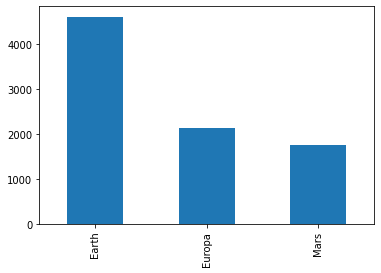

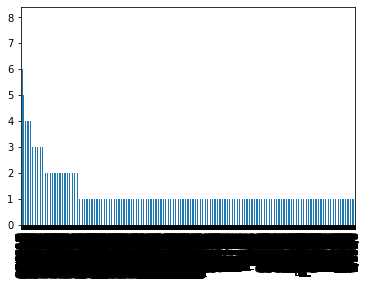

PassengerId            0
HomePlanet             0
CryoSleep            217
Cabin                  0
Destination          182
Age                  179
VIP                  203
RoomService          181
FoodCourt            183
ShoppingMall         208
Spa                  183
VRDeck               188
Name                 200
Transported            0
HomePlanet_binary      0
Cabin_binary           0
dtype: int64

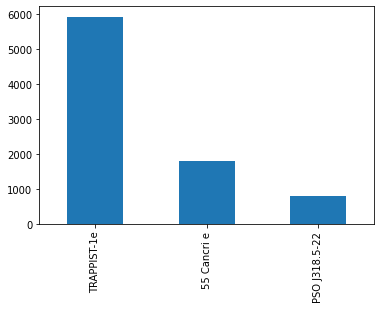

In [9]:
dftrain['HomePlanet'].value_counts()
dftrain['HomePlanet'].value_counts().plot(kind='bar')
plt.show()
dftrain['Cabin'].value_counts()
dftrain['Cabin'].value_counts().plot(kind='bar')
plt.show()
dftrain['Destination'].value_counts()
dftrain['Destination'].value_counts().plot(kind='bar')
dftrain['HomePlanet'].fillna('Unknown',inplace=True)
dftrain['Cabin'].fillna('Unknown',inplace=True)
dftrain['HomePlanet_binary']=dftrain['HomePlanet'].apply(lambda x: 0 if x=='Unknown' else 1)
dftrain['Cabin_binary']=dftrain['Cabin'].apply(lambda x: 0 if x=='Unknown' else 1)
dftrain.isnull().sum()


In [10]:
dftrain['CryoSleep'].fillna('False',inplace=True)
dftrain['VIP'].fillna('False',inplace=True)
dftrain.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,HomePlanet_binary,Cabin_binary
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,1,1
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,1,1
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,1,1
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,1,1
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,1,1


In [11]:
dftrain.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,HomePlanet_binary,Cabin_binary
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,1,1
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,1,1
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,1,1
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,1,1
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,1,1


In [12]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder=OrdinalEncoder()
object_cols=['Cabin']
dftrain[object_cols]=ordinal_encoder.fit_transform(dftrain[object_cols])
dftrain.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,HomePlanet_binary,Cabin_binary
0,0001_01,Europa,False,149.0,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,1,1
1,0002_01,Earth,False,2184.0,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,1,1
2,0003_01,Europa,False,1.0,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,1,1
3,0003_02,Europa,False,1.0,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,1,1
4,0004_01,Earth,False,2186.0,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,1,1


In [13]:
#import one-hot encoding library for categorical variables
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder(handle_unknown='ignore',sparse=False)
ohe_col=pd.DataFrame(onehotencoder.fit_transform(dftrain[['HomePlanet','Destination']]))
ohe_col.index=dftrain.index
dftrain1=dftrain.drop(['HomePlanet','Destination'],axis=1)
ohe_dftrain=pd.concat([dftrain1,ohe_col],axis=1)
ohe_dftrain.head()

,PassengerId,CryoSleep,Cabin,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,...,HomePlanet_binary,Cabin_binary,0,1,2,3,4,5,6,7
0,0001_01,False,149.0,39.0,False,0.0,0.0,0.0,0.0,0.0,...,1,1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0002_01,False,2184.0,24.0,False,109.0,9.0,25.0,549.0,44.0,...,1,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0003_01,False,1.0,58.0,True,43.0,3576.0,0.0,6715.0,49.0,...,1,1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0003_02,False,1.0,33.0,False,0.0,1283.0,371.0,3329.0,193.0,...,1,1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0004_01,False,2186.0,16.0,False,303.0,70.0,151.0,565.0,2.0,...,1,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


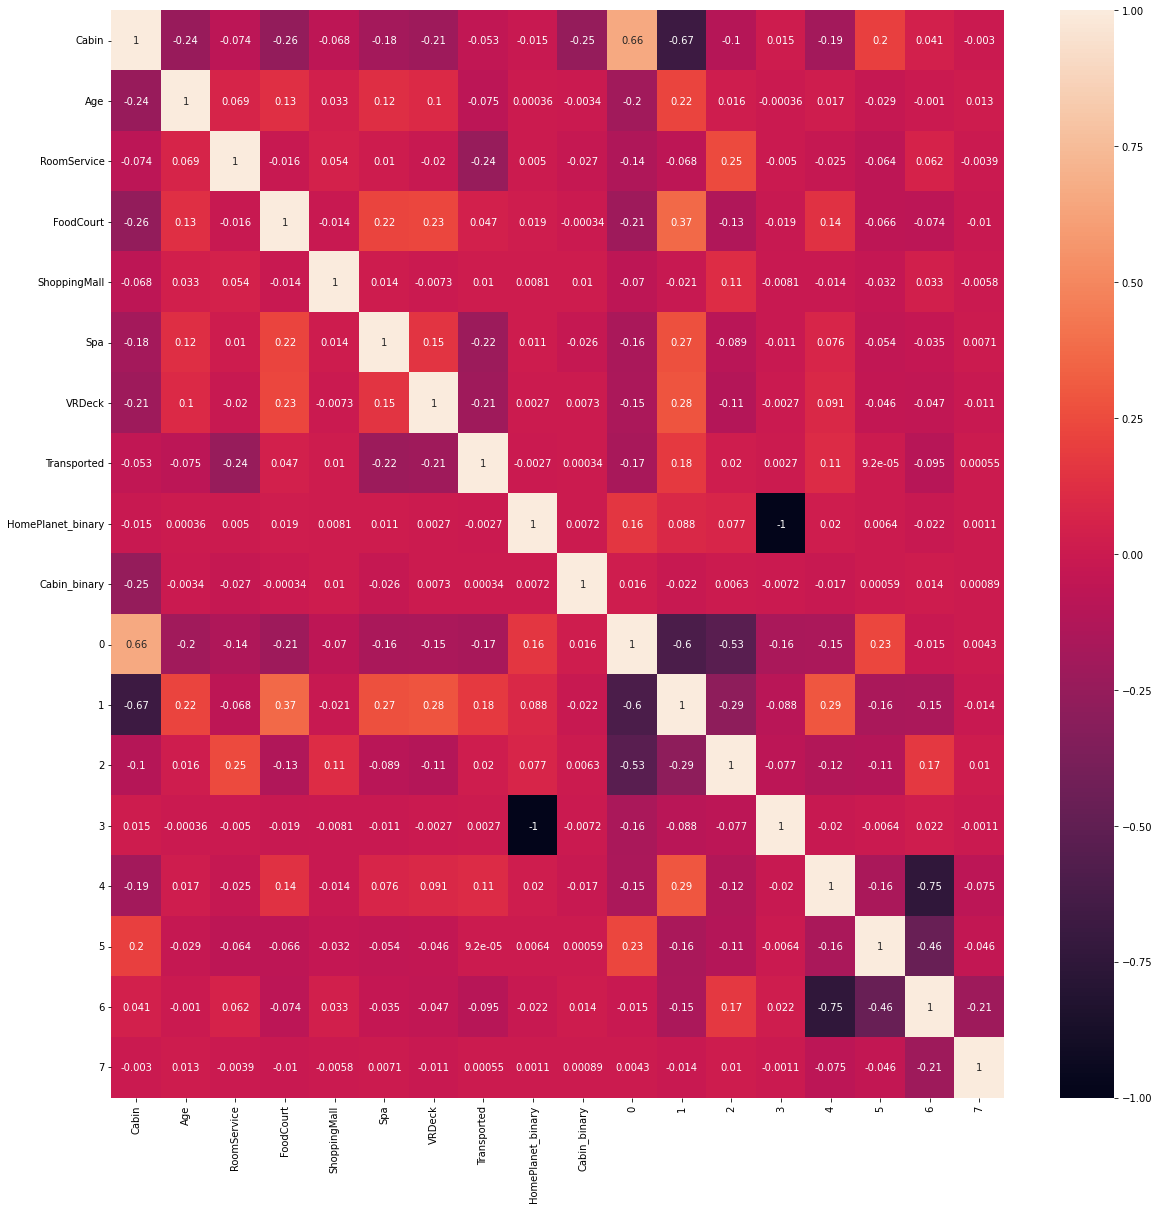

In [14]:
#draw a heatmap to see the correlation between variables
plt.figure(figsize=(20,20))
sns.heatmap(ohe_dftrain.corr(),annot=True)
plt.show()

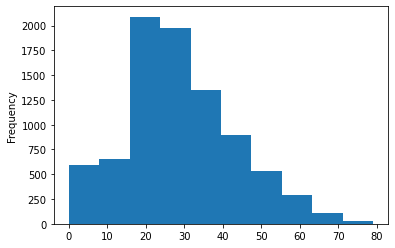

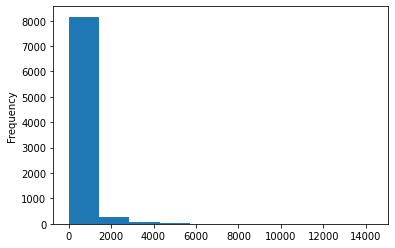

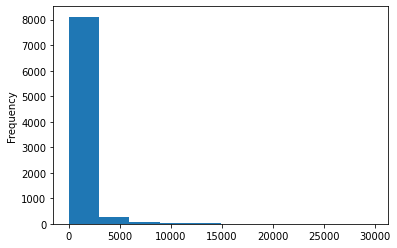

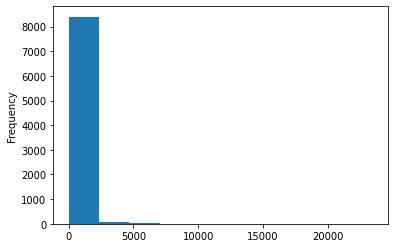

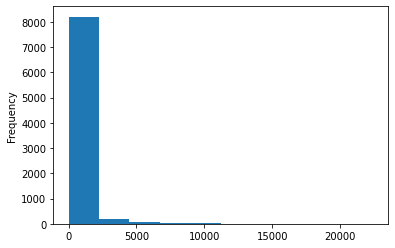

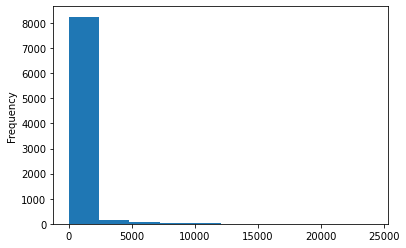

In [15]:
#draw graph of Age,RoomService,FoodCourt,ShoppingMall,Spa and VRDeck not using sns.pairplot
ohe_dftrain['Age'].plot(kind='hist')
plt.show()
ohe_dftrain['RoomService'].plot(kind='hist')
plt.show()
ohe_dftrain['FoodCourt'].plot(kind='hist')
plt.show()
ohe_dftrain['ShoppingMall'].plot(kind='hist')
plt.show()
ohe_dftrain['Spa'].plot(kind='hist')
plt.show()
ohe_dftrain['VRDeck'].plot(kind='hist')
plt.show()

In [16]:
distance_from_mean_rooms = np.abs(ohe_dftrain['RoomService'] - ohe_dftrain['RoomService'].mean())
distance_from_mean_foodcourt = np.abs(ohe_dftrain['FoodCourt'] - ohe_dftrain['FoodCourt'].mean())
distance_from_mean_shoppingmall = np.abs(ohe_dftrain['ShoppingMall'] - ohe_dftrain['ShoppingMall'].mean())
distance_from_mean_spa = np.abs(ohe_dftrain['Spa'] - ohe_dftrain['Spa'].mean())
distance_from_mean_vrdeck = np.abs(ohe_dftrain['VRDeck'] - ohe_dftrain['VRDeck'].mean())

In [17]:
std_rooms = ohe_dftrain['RoomService'].std() * 3
std_foodcourt = ohe_dftrain['FoodCourt'].std() * 3
std_shoppingmall = ohe_dftrain['ShoppingMall'].std() * 3
std_spa = ohe_dftrain['Spa'].std() * 3
std_vrdeck = ohe_dftrain['VRDeck'].std() * 3

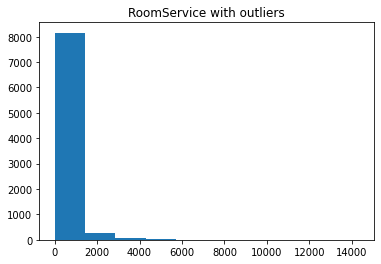

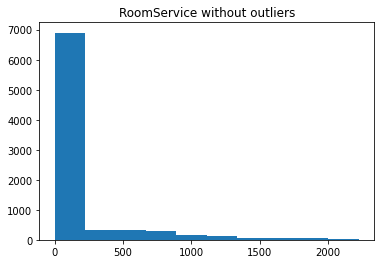

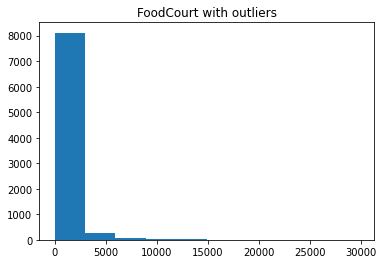

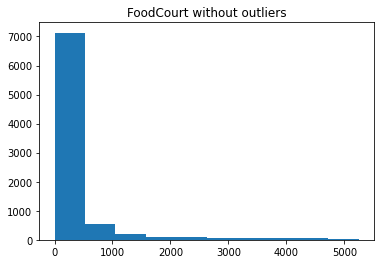

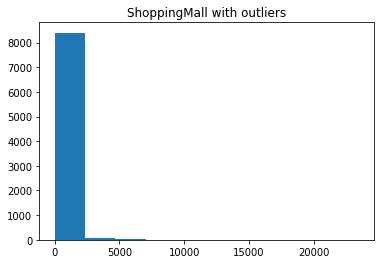

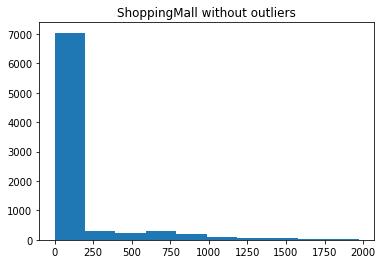

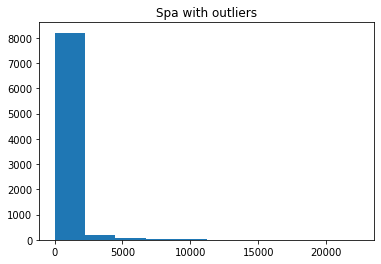

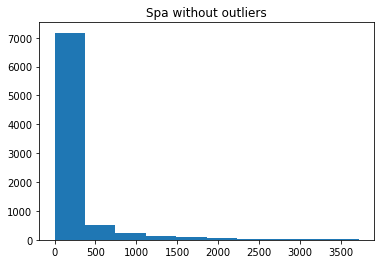

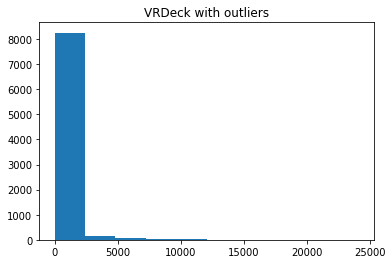

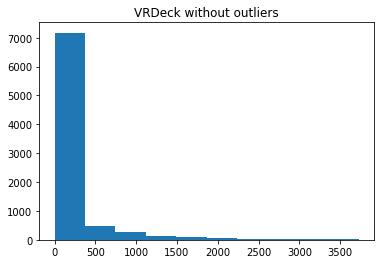

In [18]:
rooms_no_outliers = ohe_dftrain[distance_from_mean_rooms < std_rooms]['RoomService']
foodcourt_no_outliers = ohe_dftrain[distance_from_mean_foodcourt < std_foodcourt]['FoodCourt']
shoppingmall_no_outliers = ohe_dftrain[distance_from_mean_shoppingmall < std_shoppingmall]['ShoppingMall']
spa_no_outliers = ohe_dftrain[distance_from_mean_spa < std_spa]['Spa']
vrdeck_no_outliers = ohe_dftrain[distance_from_mean_vrdeck < std_vrdeck]['VRDeck']

plt.title('RoomService with outliers')
plt.hist(ohe_dftrain['RoomService'])
plt.show()
plt.title('RoomService without outliers')
plt.hist(rooms_no_outliers)
plt.show()
plt.title('FoodCourt with outliers')
plt.hist(ohe_dftrain['FoodCourt'])
plt.show()
plt.title('FoodCourt without outliers')
plt.hist(foodcourt_no_outliers)
plt.show()
plt.title('ShoppingMall with outliers')
plt.hist(ohe_dftrain['ShoppingMall'])
plt.show()
plt.title('ShoppingMall without outliers')
plt.hist(shoppingmall_no_outliers)
plt.show()
plt.title('Spa with outliers')
plt.hist(ohe_dftrain['Spa'])
plt.show()
plt.title('Spa without outliers')
plt.hist(spa_no_outliers)
plt.show()
plt.title('VRDeck with outliers')
plt.hist(ohe_dftrain['VRDeck'])
plt.show()
plt.title('VRDeck without outliers')
plt.hist(vrdeck_no_outliers)
plt.show()


In [19]:
final_dftrain=ohe_dftrain.drop(['Name'],axis=1)
final_dftrain['RoomService']=final_dftrain[distance_from_mean_rooms < std_rooms]['RoomService']
final_dftrain['FoodCourt']=final_dftrain[distance_from_mean_foodcourt < std_foodcourt]['FoodCourt']
final_dftrain['ShoppingMall']=final_dftrain[distance_from_mean_shoppingmall < std_shoppingmall]['ShoppingMall']
final_dftrain['Spa']=final_dftrain[distance_from_mean_spa < std_spa]['Spa']
final_dftrain['VRDeck']=final_dftrain[distance_from_mean_vrdeck < std_vrdeck]['VRDeck']
final_dftrain.head()

,PassengerId,CryoSleep,Cabin,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,...,HomePlanet_binary,Cabin_binary,0,1,2,3,4,5,6,7
0,0001_01,False,149.0,39.0,False,0.0,0.0,0.0,0.0,0.0,...,1,1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0002_01,False,2184.0,24.0,False,109.0,9.0,25.0,549.0,44.0,...,1,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0003_01,False,1.0,58.0,True,43.0,3576.0,0.0,NaN,49.0,...,1,1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0003_02,False,1.0,33.0,False,0.0,1283.0,371.0,3329.0,193.0,...,1,1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0004_01,False,2186.0,16.0,False,303.0,70.0,151.0,565.0,2.0,...,1,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [20]:
#drop the rows with missing values
final_dftrain.dropna(inplace=True)


In [21]:
final_dftrain=final_dftrain.astype({'CryoSleep': bool,'VIP': bool})
final_dftrain.replace({True: 1, False: 0},inplace=True)
final_dftrain.head()

,PassengerId,CryoSleep,Cabin,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,...,HomePlanet_binary,Cabin_binary,0,1,2,3,4,5,6,7
0,0001_01,0,149.0,39.0,0,0.0,0.0,0.0,0.0,0.0,...,1,1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0002_01,0,2184.0,24.0,0,109.0,9.0,25.0,549.0,44.0,...,1,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0003_02,0,1.0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,...,1,1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0004_01,0,2186.0,16.0,0,303.0,70.0,151.0,565.0,2.0,...,1,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,0005_01,0,2183.0,44.0,0,0.0,483.0,0.0,291.0,0.0,...,1,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [22]:
from sklearn.model_selection import train_test_split
X=final_dftrain.drop(['PassengerId','Transported'],axis=1)
y=final_dftrain['Transported']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)


In [25]:
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor    
model=RandomForestRegressor(n_estimators=100,random_state=0)
errors=[]
for i in range(100):
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    errors.append(mean_absolute_error(y_test,y_pred))
print('Mean Absolute Error:',np.mean(errors))    

Mean Absolute Error: 0.2828674614544959


In [26]:
import xgboost as xgb
model2=xgb.XGBRegressor(n_estimators=1000,learning_rate=0.01)
errors=[]
for i in range(100):
    model2.fit(X_train,y_train)
    y_pred=model2.predict(X_test)
    errors.append(mean_absolute_error(y_test,y_pred))
print('Mean Absolute Error:',np.mean(errors))    

Mean Absolute Error: 0.2841168036435468


In [ ]:
df_test=pd.read_csv('test.csv')
df_test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [ ]:
df_test['HomePlanet'].fillna('Unknown',inplace=True)
df_test['Cabin'].fillna('Unknown',inplace=True)
df_test['HomePlanet_binary']=df_test['HomePlanet'].apply(lambda x: 0 if x=='Unknown' else 1)
df_test['Cabin_binary']=df_test['Cabin'].apply(lambda x: 0 if x=='Unknown' else 1)
df_test['CryoSleep'].fillna('False',inplace=True)
df_test['VIP'].fillna('False',inplace=True)
object_cols=['Cabin']
df_test[object_cols]=ordinal_encoder.fit_transform(df_test[object_cols])
df_test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,HomePlanet_binary,Cabin_binary
0,0013_01,Earth,True,2784.0,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,1,1
1,0018_01,Earth,False,1867.0,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,1,1
2,0019_01,Europa,True,257.0,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,1,1
3,0021_01,Europa,False,259.0,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,1,1
4,0023_01,Earth,False,1940.0,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,1,1


In [ ]:
df_eval_test=df_test.copy()
df_eval_test=df_eval_test.astype({'CryoSleep': bool,'VIP': bool})
df_eval_test.replace({True: 1, False: 0},inplace=True)
ohe_col=pd.DataFrame(onehotencoder.fit_transform(df_eval_test[['HomePlanet','Destination']]))
ohe_col.index=df_eval_test.index
df_eval_test1=df_eval_test.drop(['HomePlanet','Destination'],axis=1)
ohe_dftest=pd.concat([df_eval_test1,ohe_col],axis=1)
ohe_dftest.head()

,PassengerId,CryoSleep,Cabin,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,...,HomePlanet_binary,Cabin_binary,0,1,2,3,4,5,6,7
0,0013_01,1,2784.0,27.0,0,0.0,0.0,0.0,0.0,0.0,...,1,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0018_01,0,1867.0,19.0,0,0.0,9.0,0.0,2823.0,0.0,...,1,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0019_01,1,257.0,31.0,0,0.0,0.0,0.0,0.0,0.0,...,1,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0021_01,0,259.0,38.0,0,0.0,6652.0,0.0,181.0,585.0,...,1,1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0023_01,0,1940.0,20.0,0,10.0,0.0,635.0,0.0,0.0,...,1,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
final_dftest=ohe_dftest.drop(['Name','PassengerId'],axis=1)
final_dftest.head()

,CryoSleep,Cabin,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_binary,Cabin_binary,0,1,2,3,4,5,6,7
0,1,2784.0,27.0,0,0.0,0.0,0.0,0.0,0.0,1,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0,1867.0,19.0,0,0.0,9.0,0.0,2823.0,0.0,1,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,257.0,31.0,0,0.0,0.0,0.0,0.0,0.0,1,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0,259.0,38.0,0,0.0,6652.0,0.0,181.0,585.0,1,1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0,1940.0,20.0,0,10.0,0.0,635.0,0.0,0.0,1,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
df_test['Transported']=df_test['Transported'].apply(lambda x: 0 if x<0.5 else 1)
df_test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,HomePlanet_binary,Cabin_binary,Transported
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,1,1,1
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,1,1,0
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,1,1,1
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,1,1,1
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,1,1,1


In [ ]:
df_test['Transported']=df_test['Transported'].apply(lambda x: 'False' if x==0 else 'True')
df_test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,HomePlanet_binary,Cabin_binary,Transported
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,1,1,True
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,1,1,False
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,1,1,True
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,1,1,True
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,1,1,True


In [ ]:
df_sub=df_test[['PassengerId','Transported']]
df_sub.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True


In [ ]:
#save the submission file
df_sub.to_csv('submission_XGB2.csv',index=False)